# Text analysis of leadership day idea generation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.style as style
import math
style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10

ebi_data = pd.read_csv("C:/Users/shane.mcdonald/Desktop/even_better_if.csv")

ebi_safety = ebi_data[ebi_data["Pillar"] == "Safety"]
ebi_people = ebi_data[ebi_data["Pillar"] == "People"]
ebi_cash = ebi_data[ebi_data["Pillar"] == "Cash"]
ebi_partnership = ebi_data[ebi_data["Pillar"] == "Partnership"]
ebi_growth = ebi_data[ebi_data["Pillar"] == "Growth"]

safety = " ".join(comment for comment in ebi_safety["Comment"])
people = " ".join(comment for comment in ebi_people["Comment"])
cash = " ".join(comment for comment in ebi_cash["Comment"])
partnership = " ".join(comment for comment in ebi_partnership["Comment"])
growth = " ".join(comment for comment in ebi_growth["Comment"])

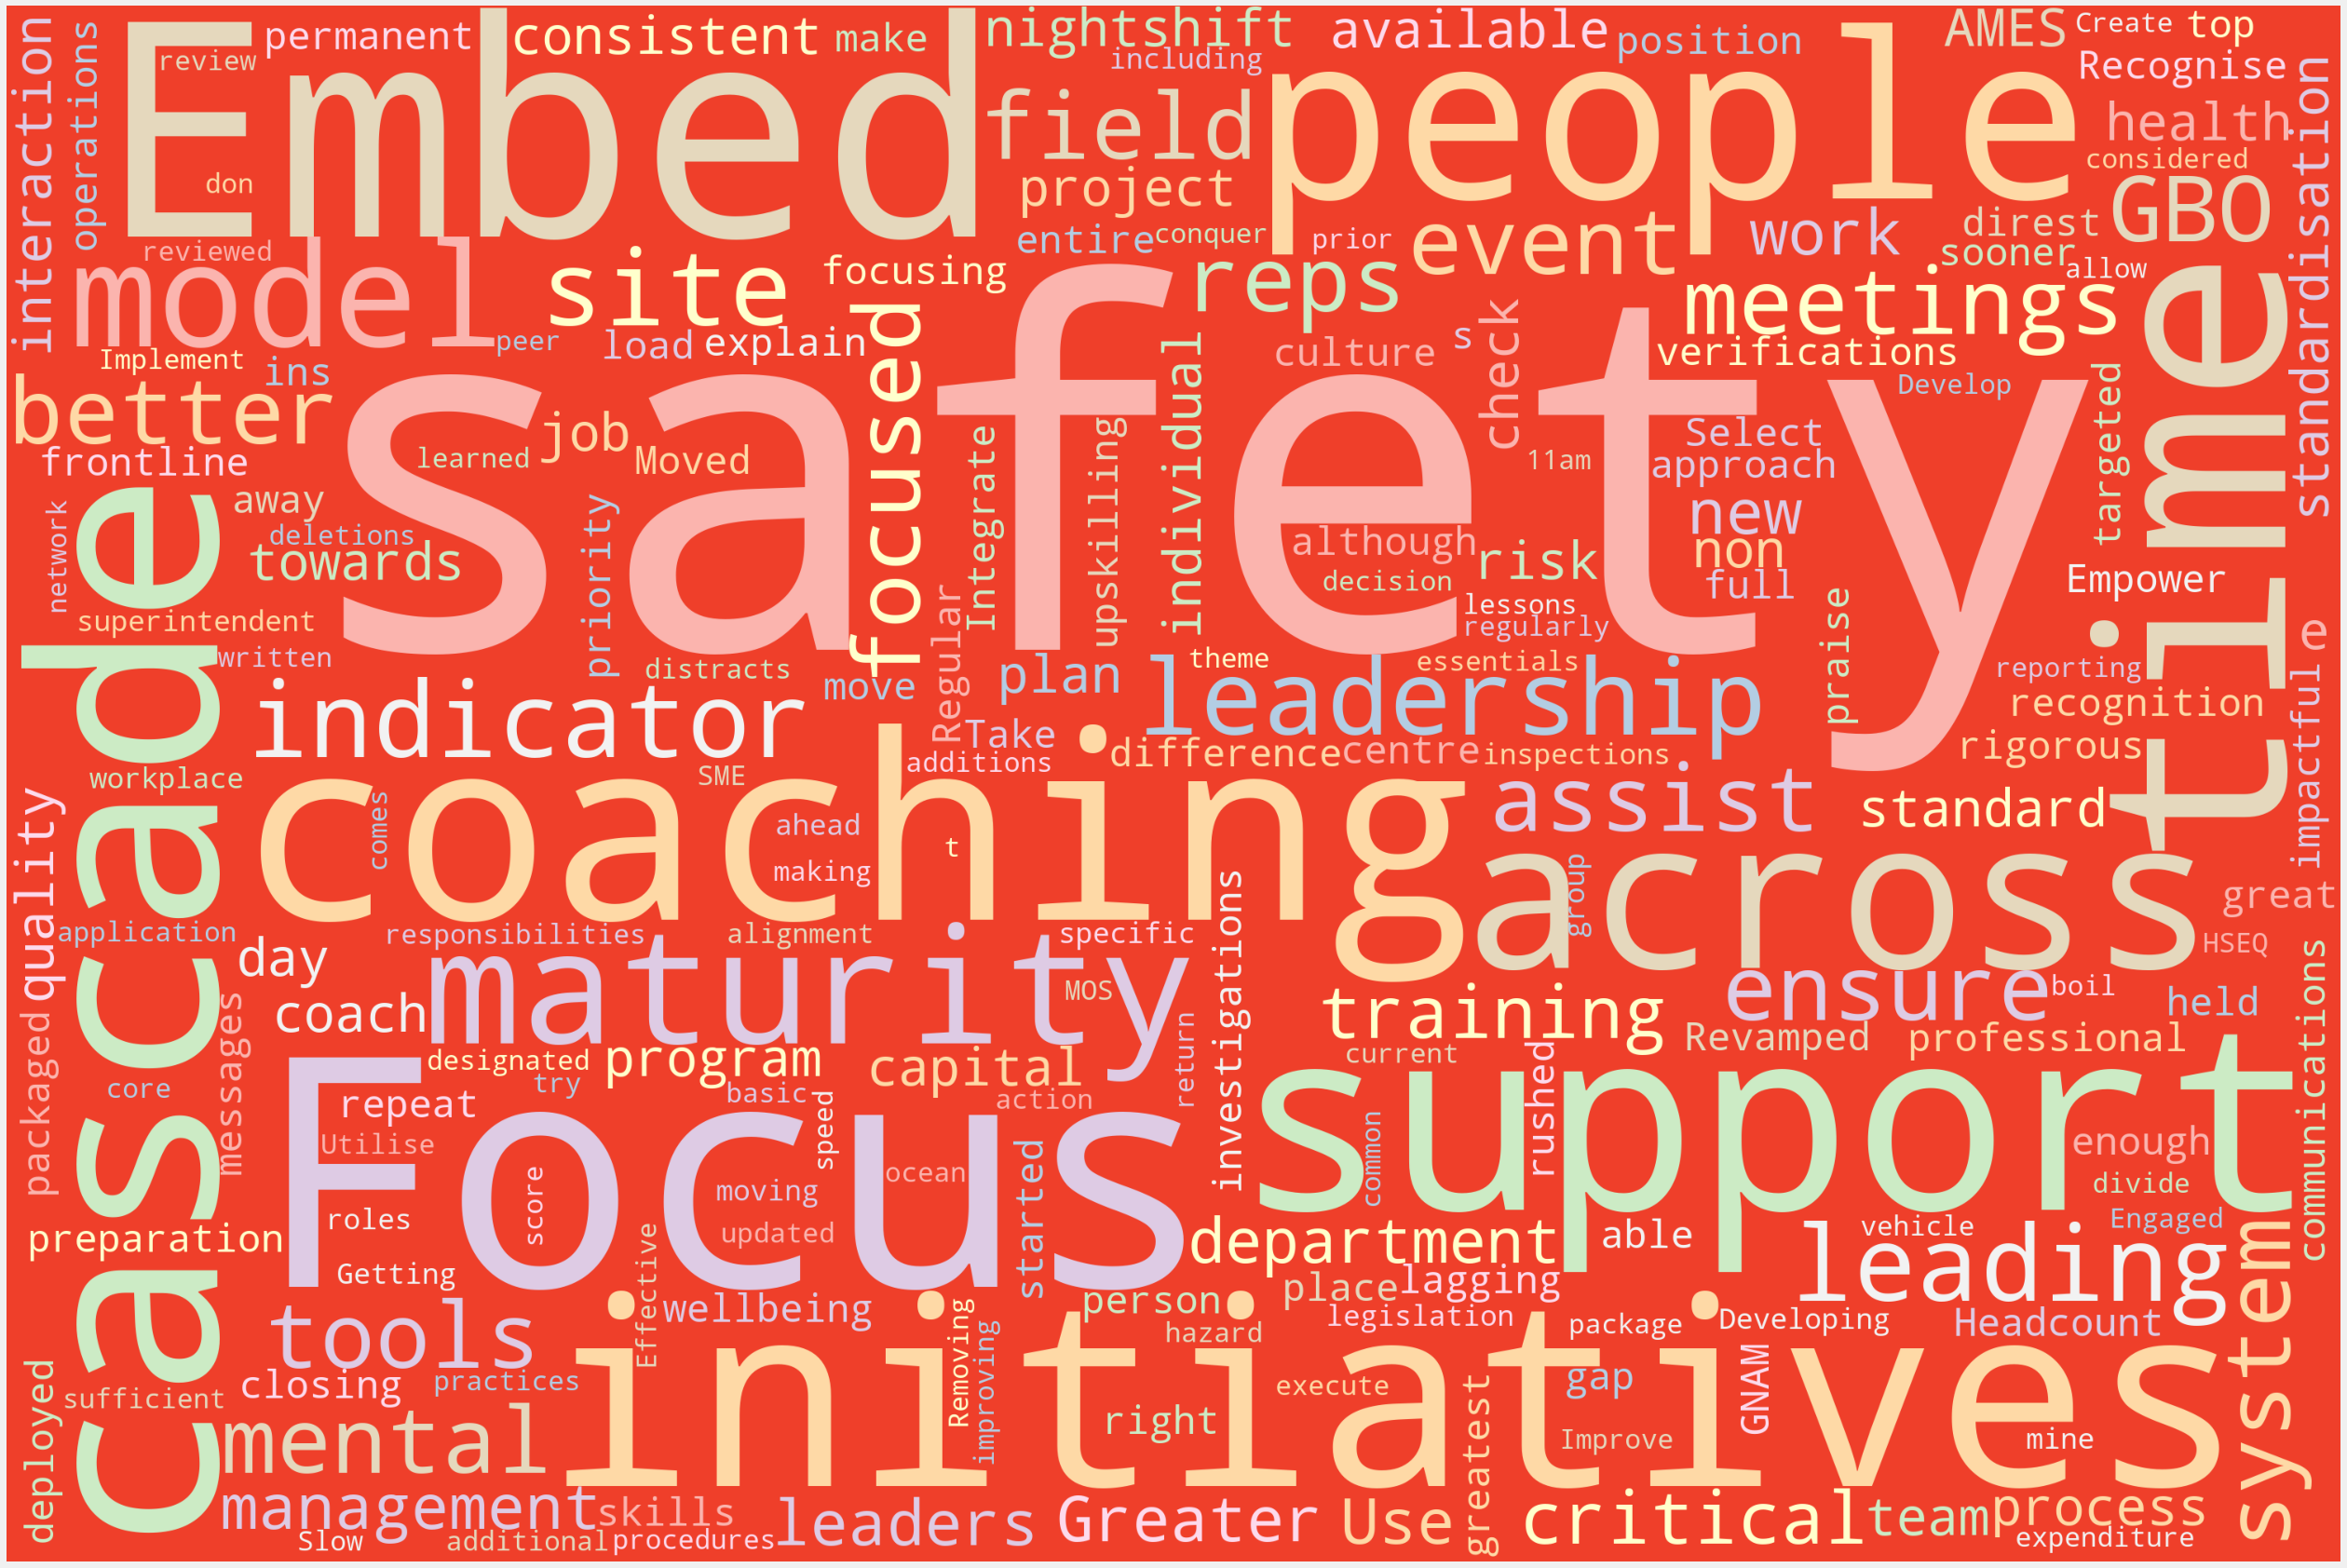

In [2]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color=(239,63,42), colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(safety)
# Plot
plot_cloud(wordcloud)

safety 29
focus 8
embed 7
support 5
cascade 5
coaching 5
initiatives 5
people 4
maturity 4
model 4
leadership 4
leading 4
time 4
tools 3
reps 3
meetings 3
mental 3
ensure 3
better 3
gbo 3


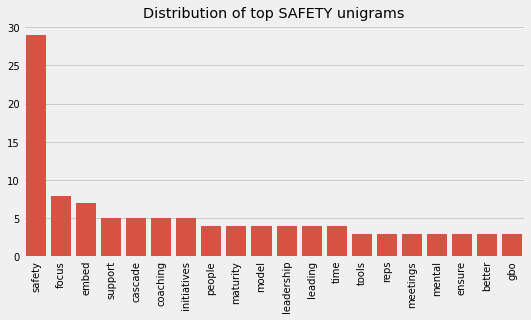

In [3]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(ebi_safety['Comment'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Comment' , 'count'])
df1.groupby('Comment').sum()['count'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[8,4])
ax = sns.barplot(x="Comment", y="count", data=df1, color=(239/255,63/255,42/255))
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Distribution of top SAFETY unigrams")
plt.xticks(rotation=90)
plt.show()

cascade coaching 5
embed cascade 4
safety tools 3
safety reps 3
safety maturity 3
maturity model 3
safety initiatives 3
leadership field 2
indicator focused 2
critical risk 2
risk management 2
greater focus 2
coach leaders 2
quality safety 2
select safety 1
tools embed 1
empower frontline 1
frontline safety 1
safety safety 1
reps place 1


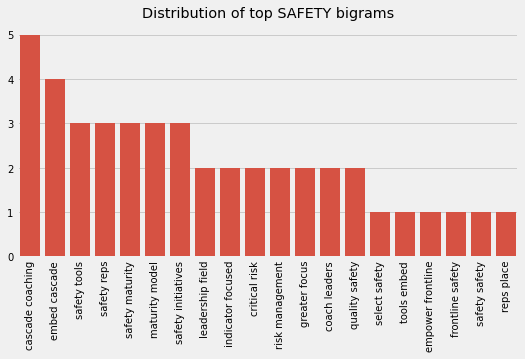

In [4]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(ebi_safety['Comment'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Comment' , 'count'])
df2.groupby('Comment').sum()['count'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[8,4])
ax = sns.barplot(x="Comment", y="count", data=df2, color=(239/255,63/255,42/255))
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Distribution of top SAFETY bigrams")
plt.xticks(rotation=90)
plt.show()

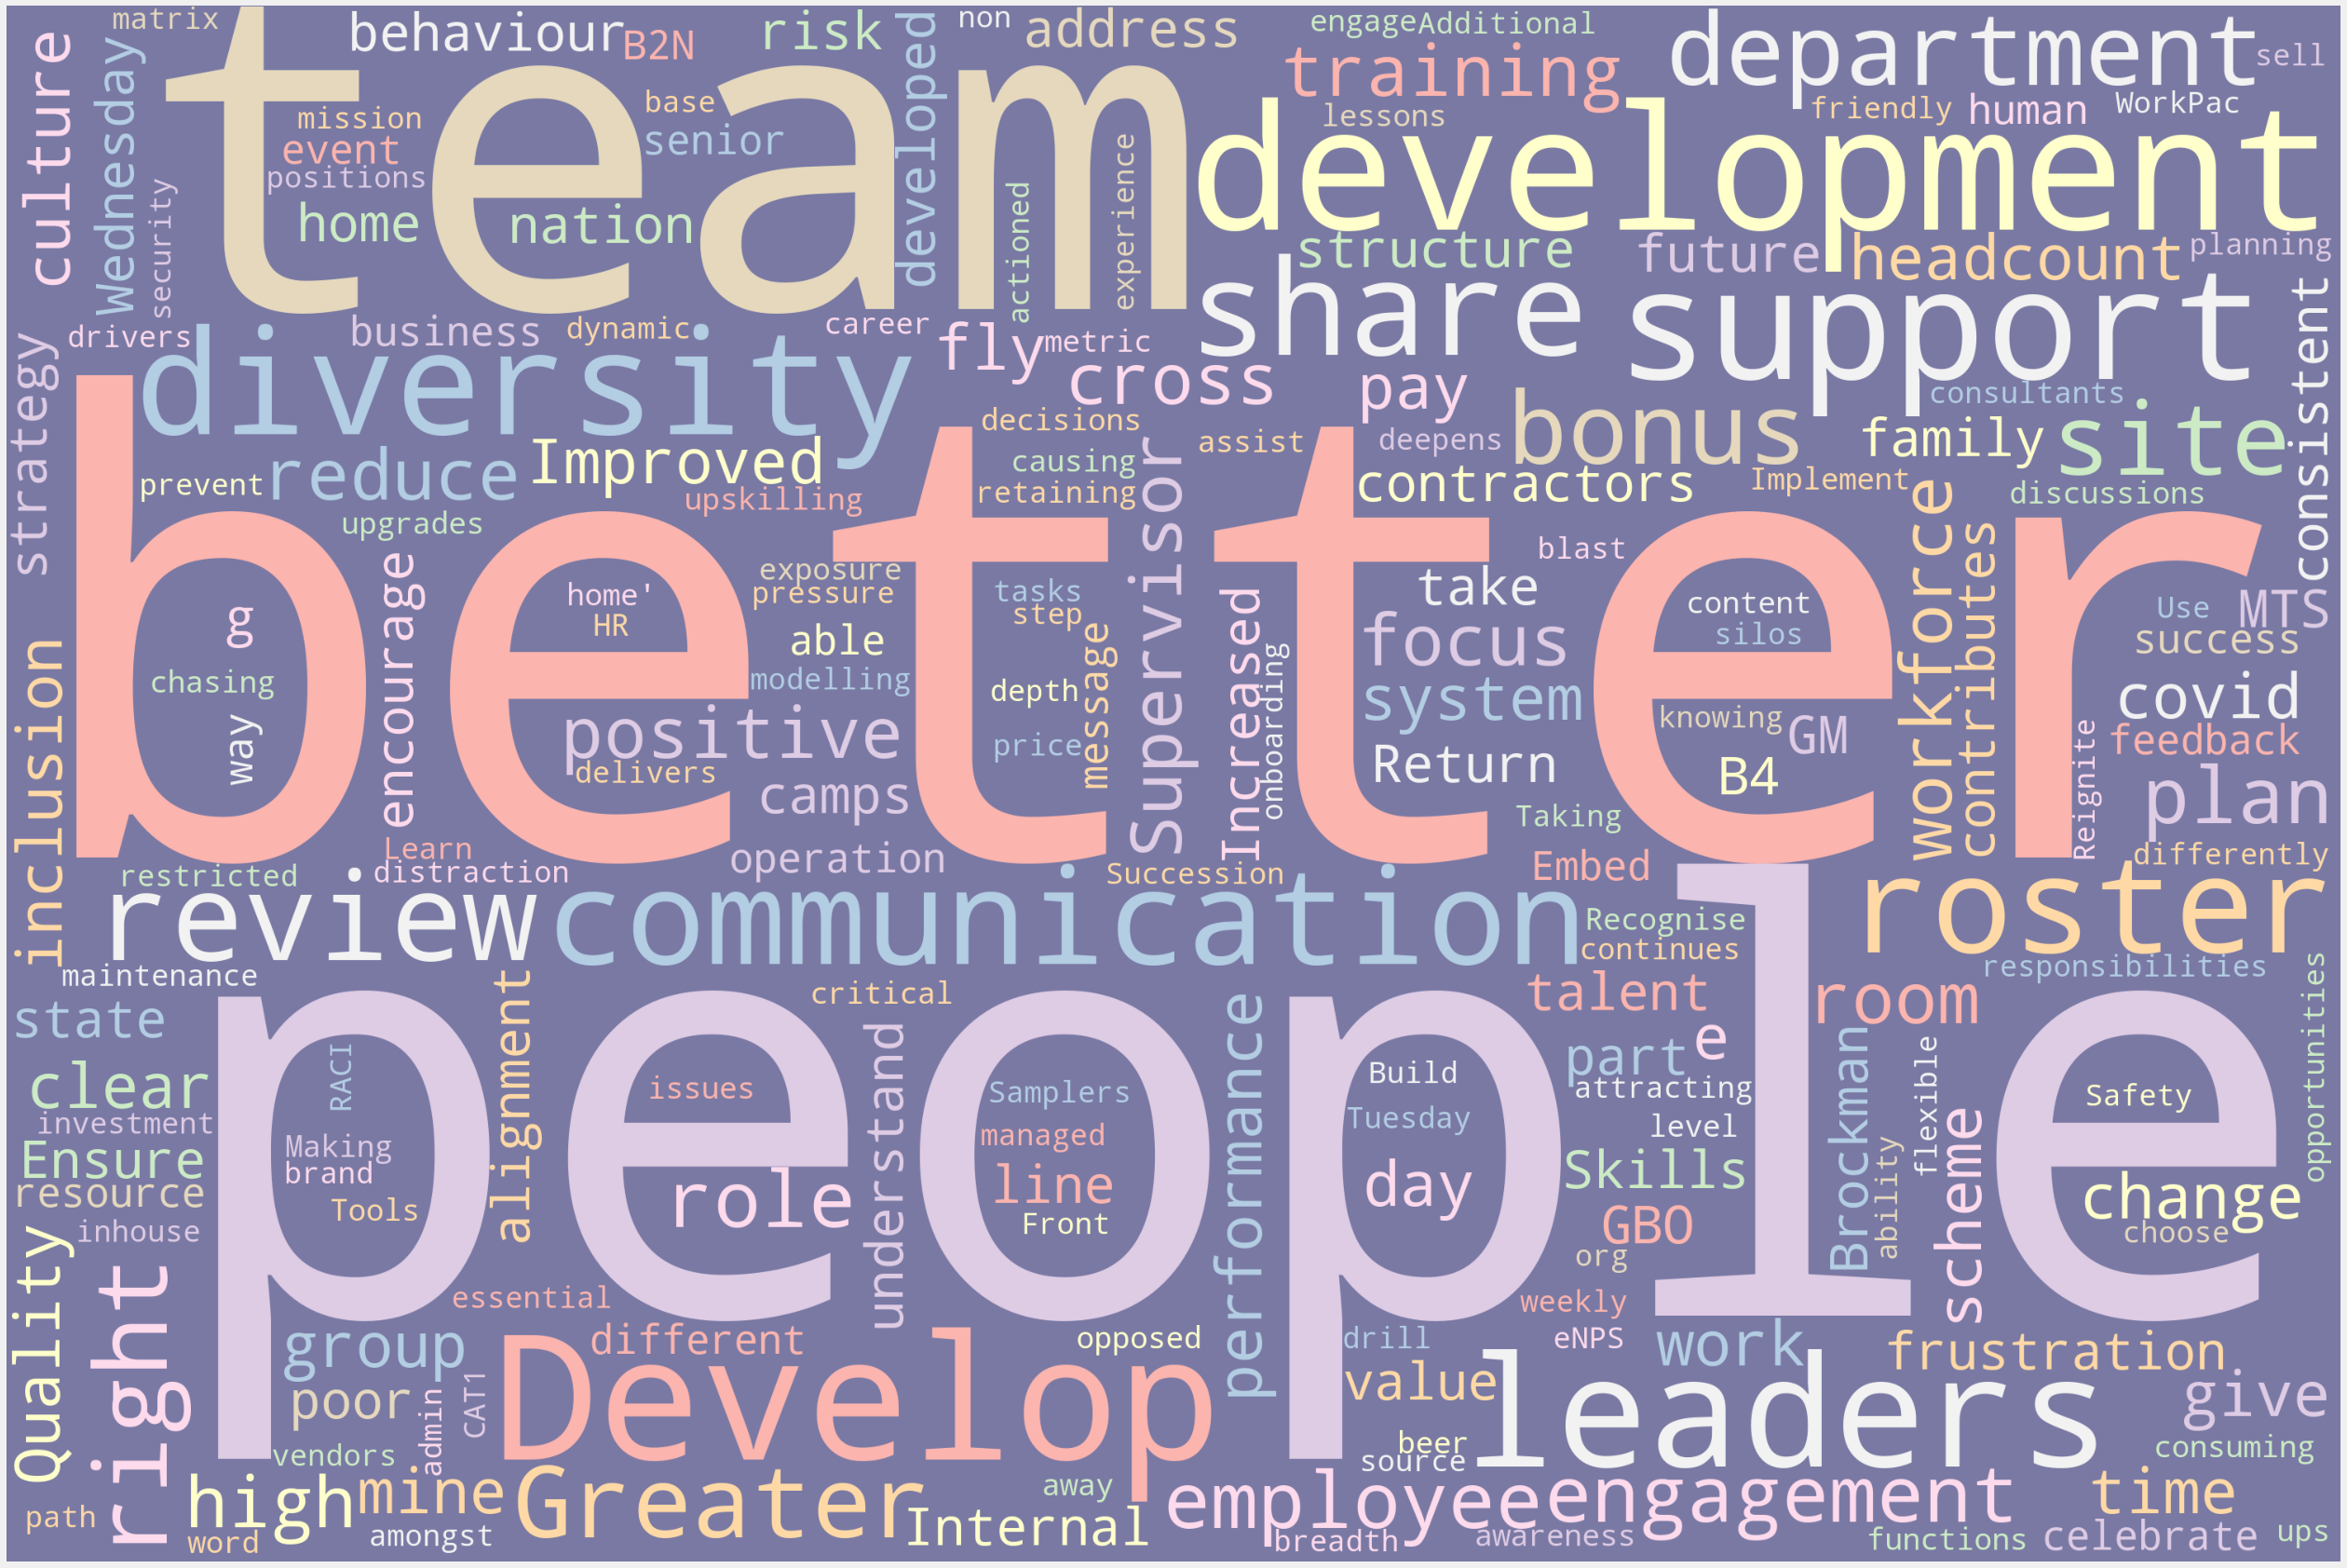

In [5]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color=(121,121,164), colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(people)
# Plot
plot_cloud(wordcloud)

better 14
people 13
development 9
develop 9
support 7
leaders 7
diversity 7
team 6
share 6
teams 6
roster 5
bonus 5
greater 5
right 5
site 5
engagement 5
plans 4
cross 4
focus 4
training 4


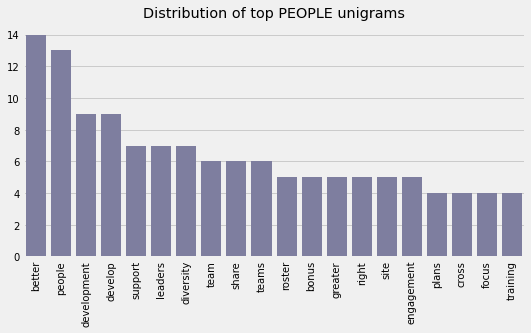

In [6]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(ebi_people['Comment'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Comment' , 'count'])

df3.groupby('Comment').sum()['count'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[8,4])
ax = sns.barplot(x="Comment", y="count", data=df3, color=(121/255,121/255,164/255))
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Distribution of top PEOPLE unigrams")
plt.xticks(rotation=90)
plt.show()

development plans 4
roster changes 2
cross department 2
leaders people 2
bonus scheme 2
develop team 2
right people 2
wednesday fly 2
fly day 2
internal talent 2
talent reviews 2
understand team 2
team contributes 2
celebrate success 2
inclusion diversity 2
quality discussions 1
discussions content 1
content development 1
plans actioned 1
actioned opposed 1


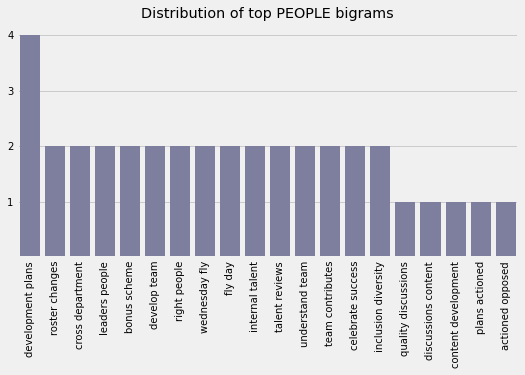

In [7]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(ebi_people['Comment'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Comment' , 'count'])

df4.groupby('Comment').sum()['count'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[8,4])
ax = sns.barplot(x="Comment", y="count", data=df4, color=(121/255,121/255,164/255))
yint = range(min(df4["count"]), math.ceil(max(df4["count"])+1))
plt.yticks(yint)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Distribution of top PEOPLE bigrams")
plt.xticks(rotation=90)
plt.show()

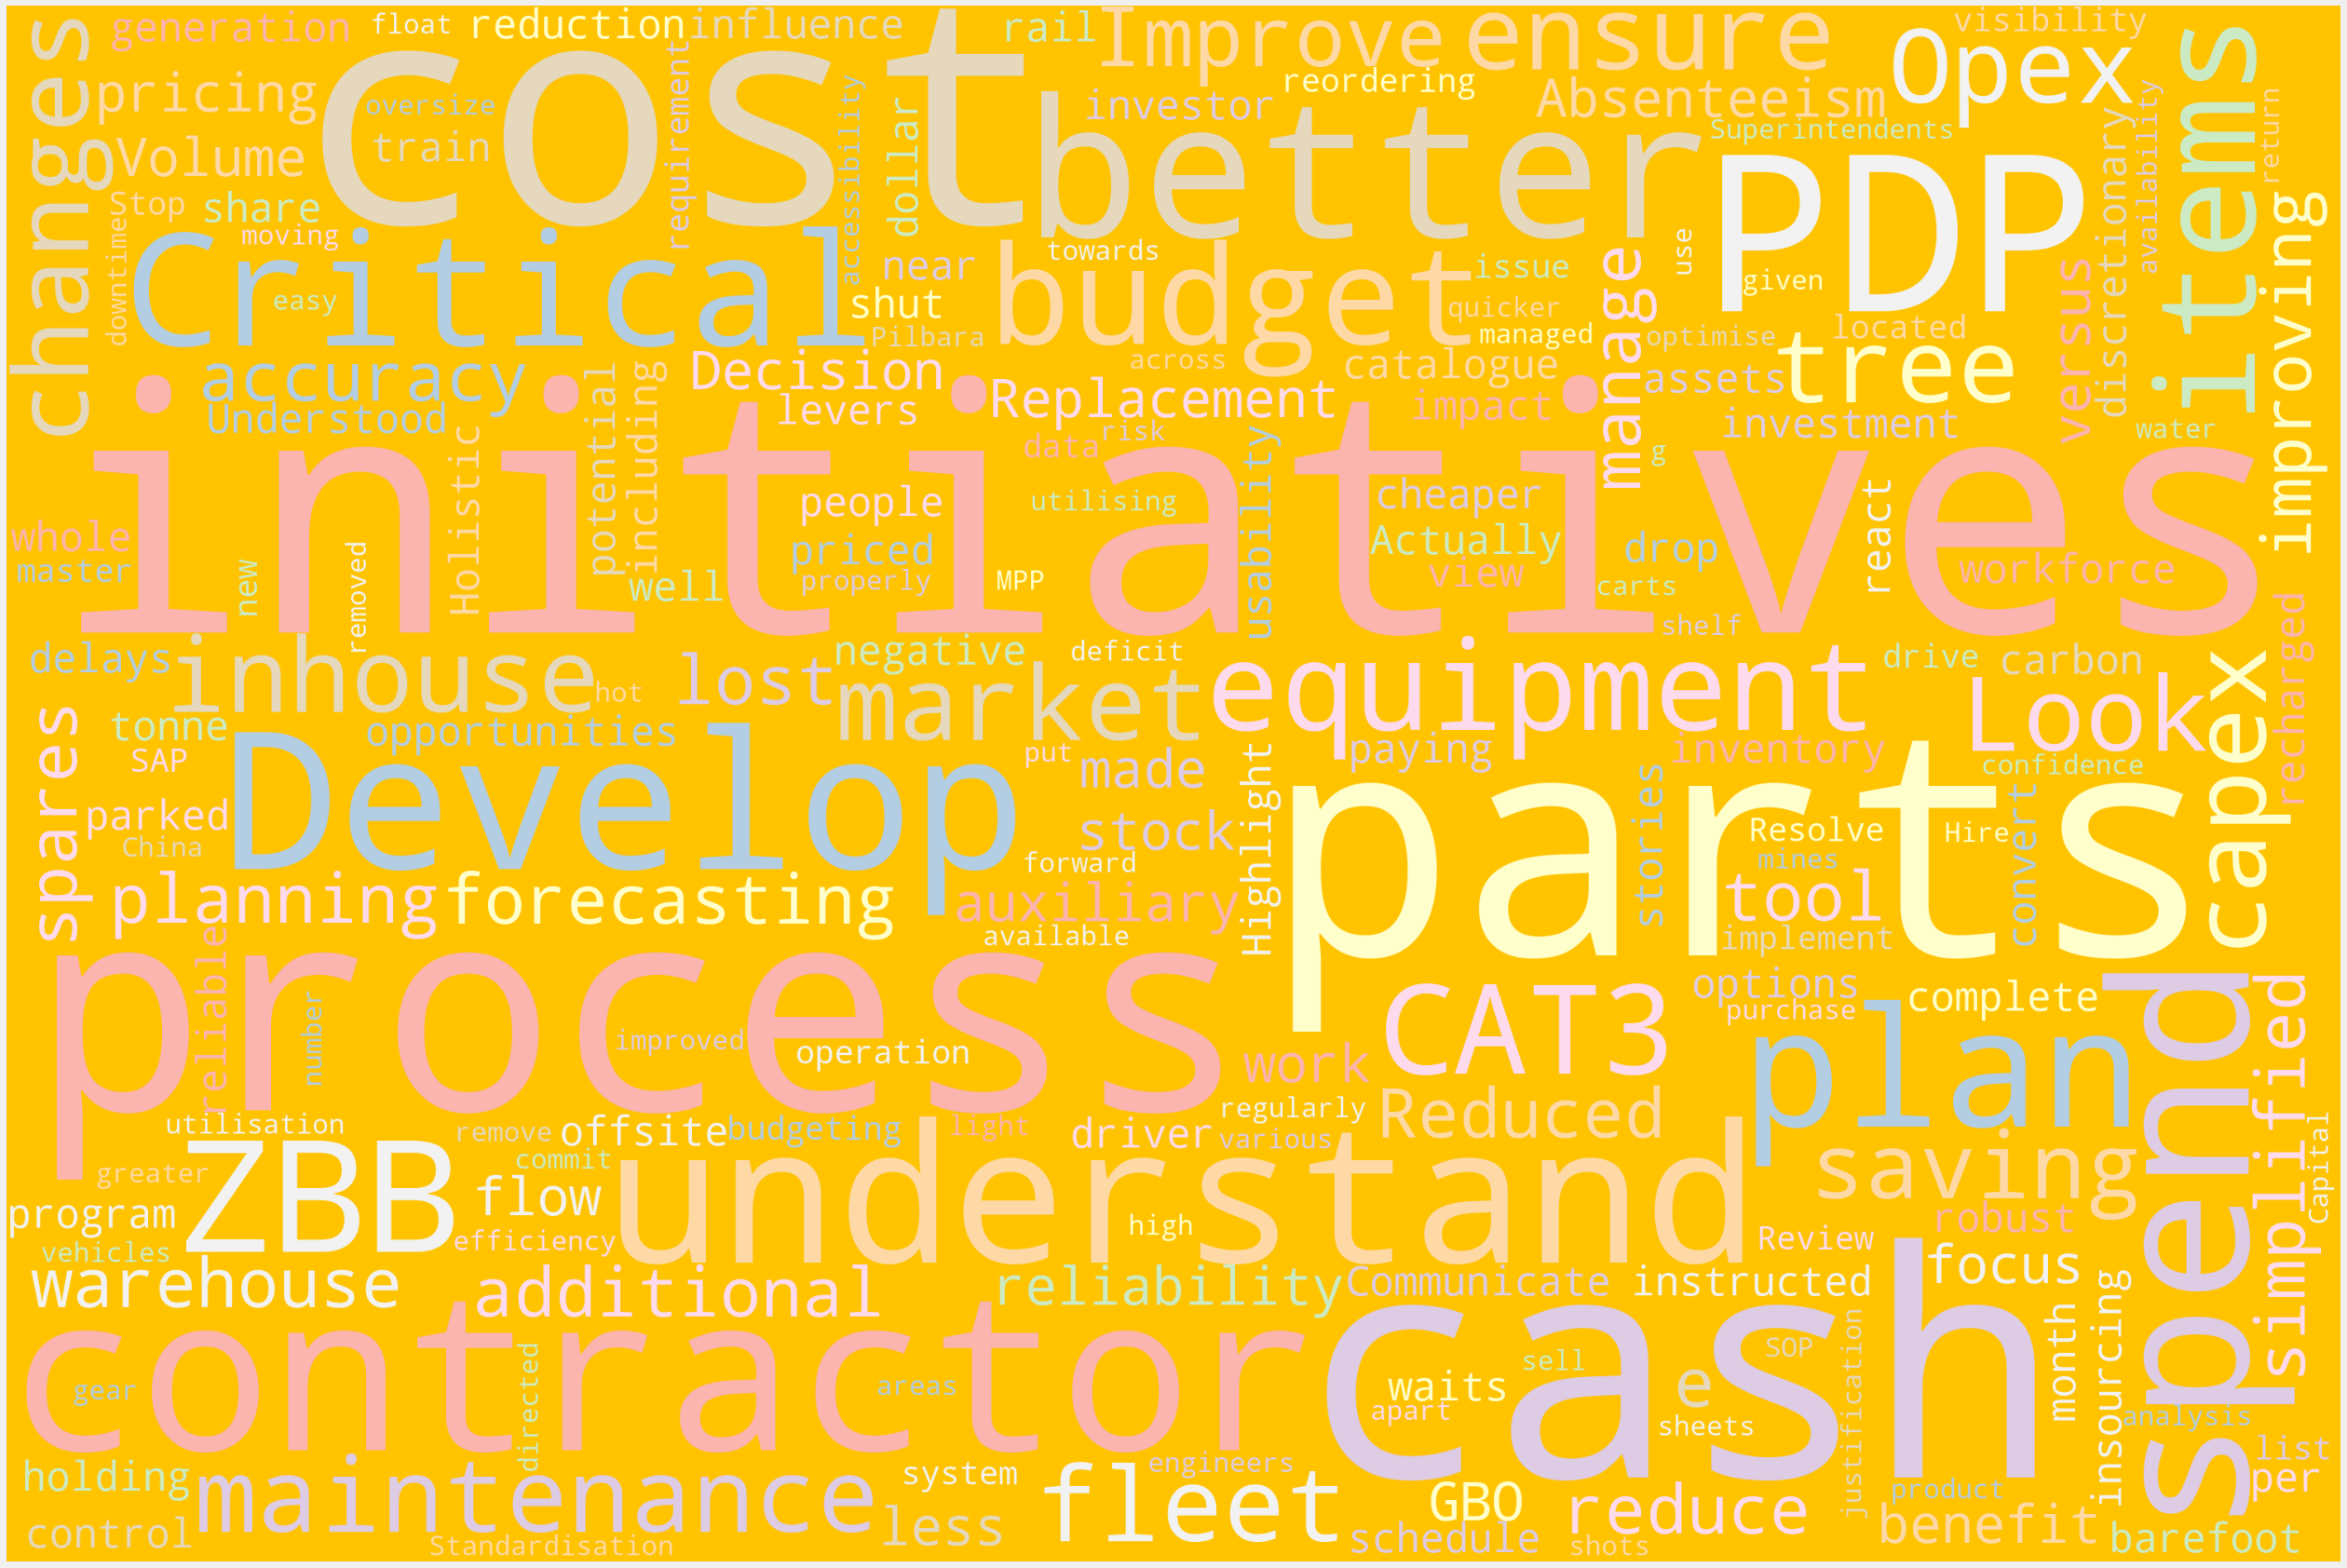

In [8]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color=(255,195,0), colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(cash)
# Plot
plot_cloud(wordcloud)

initiatives 7
cash 6
parts 6
process 5
pdp 4
develop 3
understand 3
better 3
spend 3
plan 3
cost 3
critical 3
zbb 3
budget 3
items 3
costs 3
equipment 3
cat3 3
contractors 3
look 2


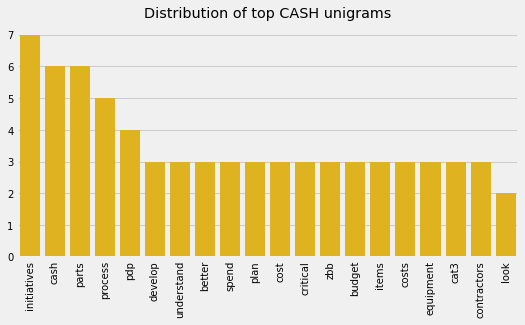

In [9]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(ebi_cash['Comment'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Comment' , 'count'])

df3.groupby('Comment').sum()['count'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[8,4])
ax = sns.barplot(x="Comment", y="count", data=df3, color=(255/255,195/255,0/255))
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Distribution of top CASH unigrams")
plt.xticks(rotation=90)
plt.show()

pdp initiatives 4
cat3 contractors 3
critical spares 2
lost parts 2
process simplified 2
zbb process 2
people share 1
share stories 1
stories cash 1
cash generation 1
generation reduction 1
reduction initiatives 1
look opportunities 1
opportunities complete 1
complete maintenance 1
maintenance inhouse 1
inhouse cheaper 1
cheaper offsite 1
develop inhouse 1
inhouse inventory 1


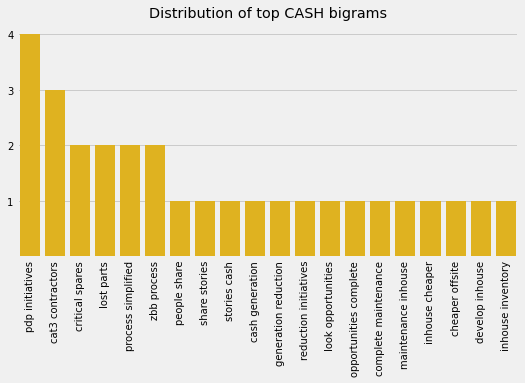

In [10]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(ebi_cash['Comment'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Comment' , 'count'])

df4.groupby('Comment').sum()['count'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[8,4])
ax = sns.barplot(x="Comment", y="count", data=df4, color=(255/255,195/255,0/255))
yint = range(min(df4["count"]), math.ceil(max(df4["count"])+1))
plt.yticks(yint)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Distribution of top CASH bigrams")
plt.xticks(rotation=90)
plt.show()

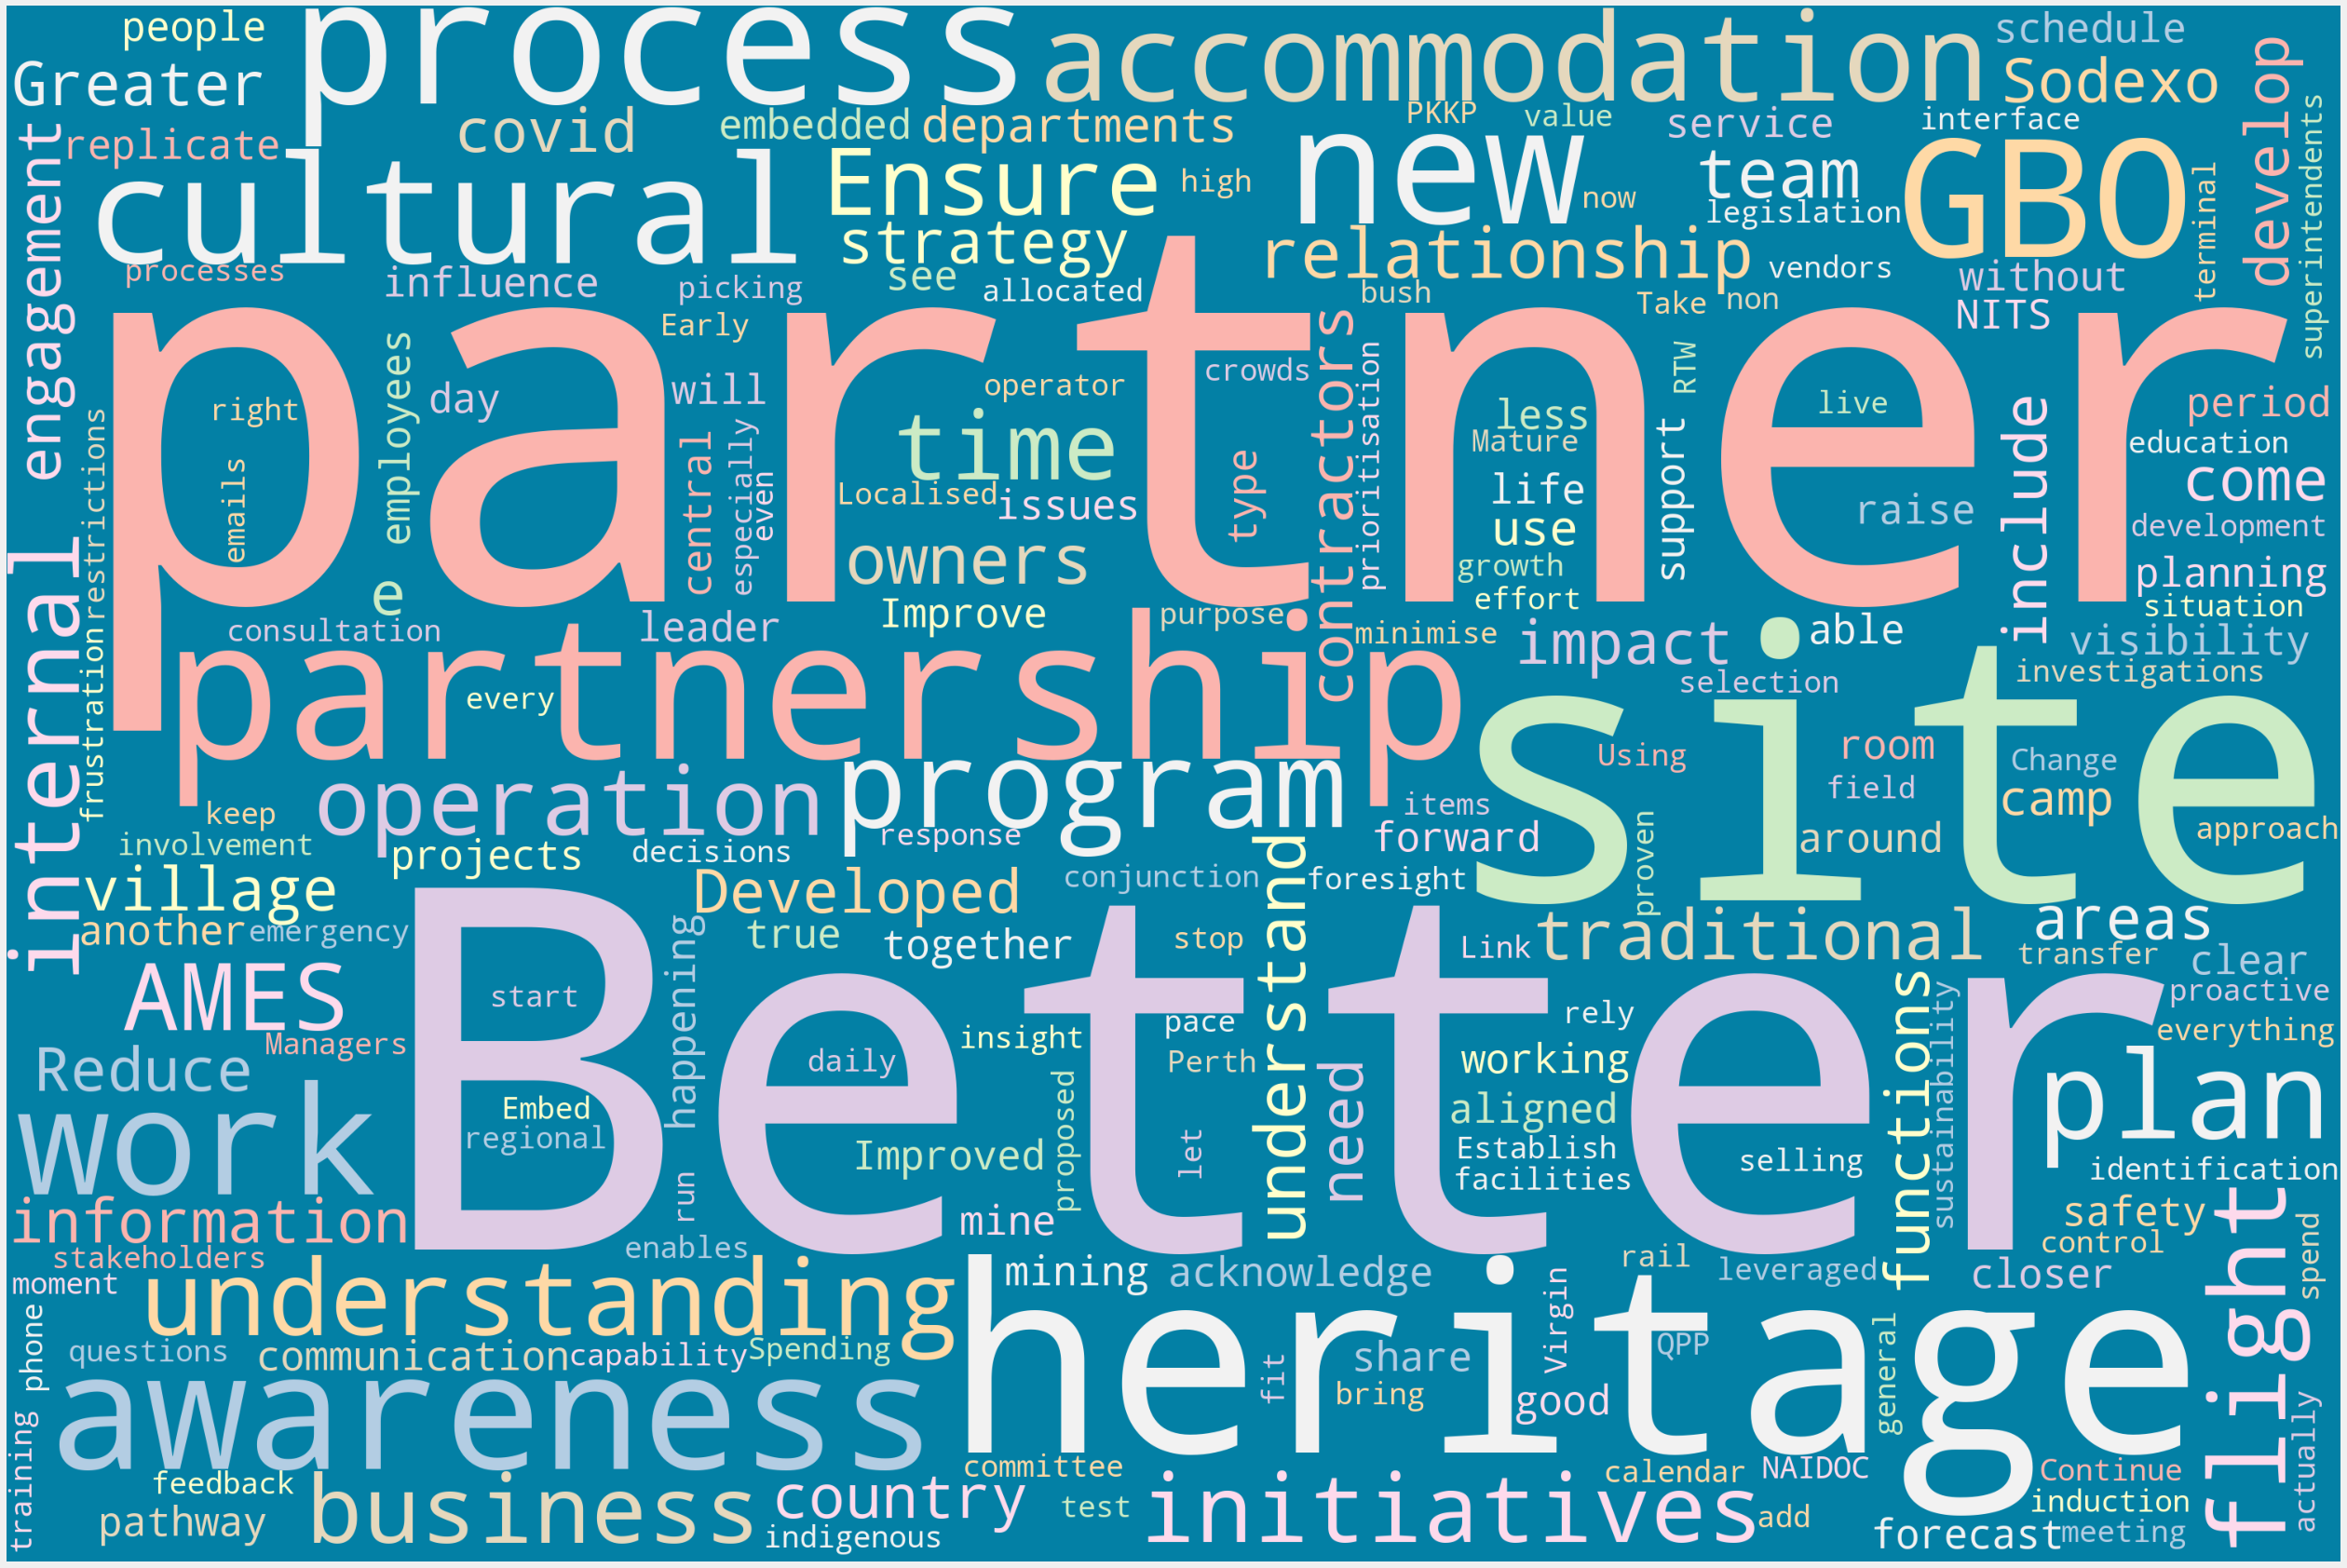

In [11]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color=(3,128,165), colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(partnership)
# Plot
plot_cloud(wordcloud)

better 15
partners 12
site 12
heritage 10
partnership 9
process 7
new 6
awareness 6
gbo 6
work 5
partner 5
cultural 5
accommodation 5
understanding 5
time 4
internal 4
ames 4
initiatives 4
business 4
ensure 4


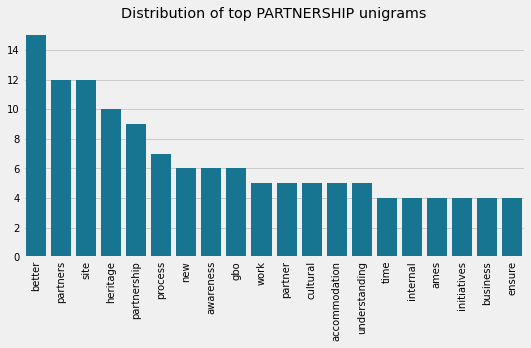

In [12]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(ebi_partnership['Comment'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Comment' , 'count'])

df3.groupby('Comment').sum()['count'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[8,4])
ax = sns.barplot(x="Comment", y="count", data=df3, color=(3/255,128/255,165/255))
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Distribution of top PARTNERSHIP unigrams")
plt.xticks(rotation=90)
plt.show()

cultural awareness 5
traditional owners 4
flights accommodation 3
internal partners 2
heritage areas 2
closer partnership 2
come gbo 2
true partnership 2
partnership sodexo 2
ames site 2
understand traditional 2
better leveraged 1
leveraged partners 1
partners leader 1
leader relationships 1
spending time 1
time picking 1
picking phone 1
phone time 1
time emails 1


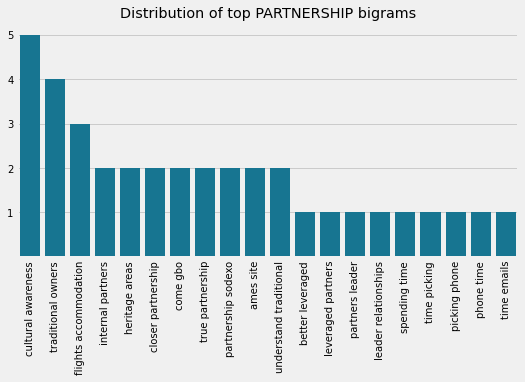

In [13]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(ebi_partnership['Comment'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Comment' , 'count'])

df4.groupby('Comment').sum()['count'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[8,4])
ax = sns.barplot(x="Comment", y="count", data=df4, color=(3/255,128/255,165/255))
yint = range(min(df4["count"]), math.ceil(max(df4["count"])+1))
plt.yticks(yint)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Distribution of top PARTNERSHIP bigrams")
plt.xticks(rotation=90)
plt.show()

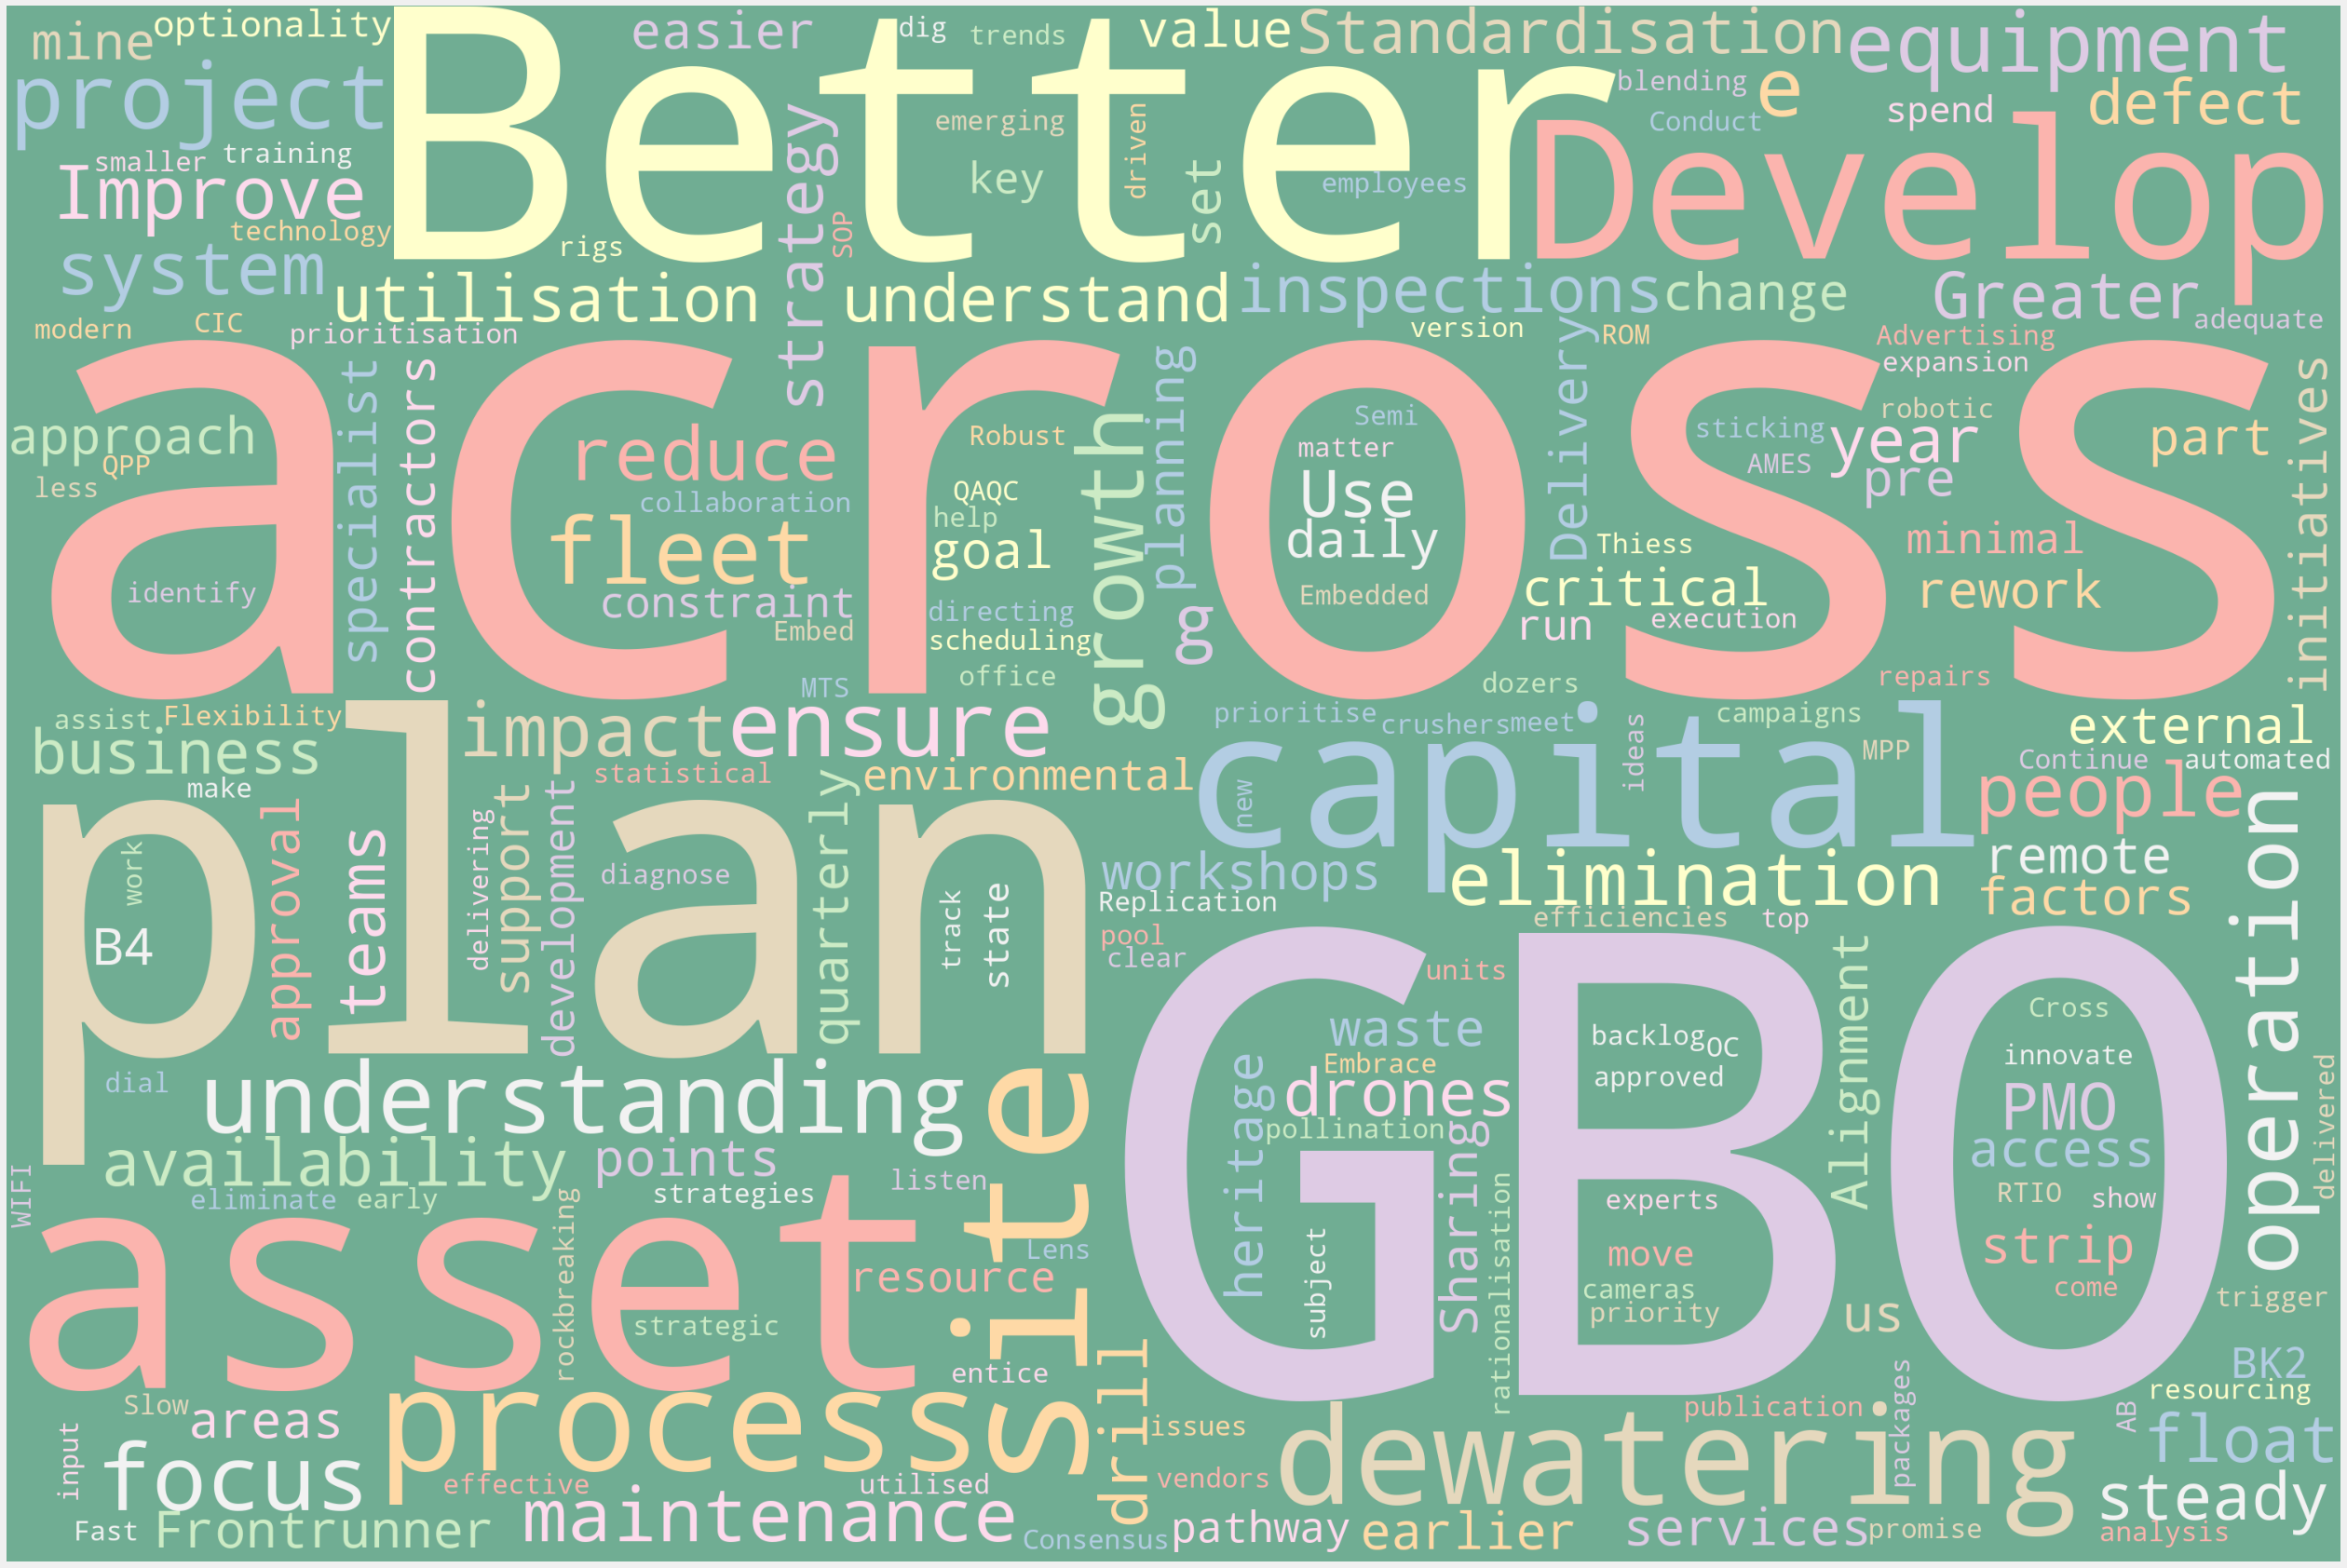

In [14]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color=(112,173,147), colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(growth)
# Plot
plot_cloud(wordcloud)

gbo 14
better 13
plan 12
develop 9
capital 9
assets 8
process 7
dewatering 7
understanding 7
focus 6
fleet 6
growth 6
ensure 6
equipment 5
maintenance 4
reduce 4
improve 4
sites 4
operations 4
people 4


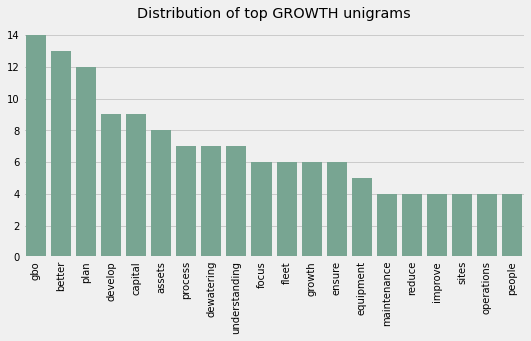

In [15]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(ebi_growth['Comment'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Comment' , 'count'])

df3.groupby('Comment').sum()['count'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[8,4])
ax = sns.barplot(x="Comment", y="count", data=df3, color=(112/255,173/255,147/255))
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Distribution of top GROWTH unigrams")
plt.xticks(rotation=90)
plt.show()

better understanding 3
defect elimination 3
elimination process 3
reduce rework 2
quarterly plan 2
pre strip 2
year plan 2
plan gbo 2
equipment gbo 2
steady state 2
spend capital 2
conduct eliminate 1
eliminate waste 1
waste workshops 1
workshops operation 1
operation prioritise 1
prioritise critical 1
develop maintenance 1
maintenance strategies 1
strategies reduce 1


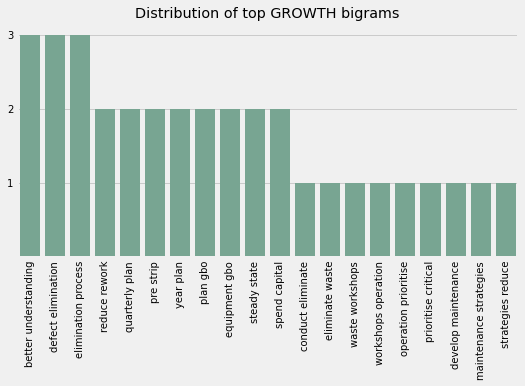

In [16]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(ebi_growth['Comment'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Comment' , 'count'])

df4.groupby('Comment').sum()['count'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[8,4])
ax = sns.barplot(x="Comment", y="count", data=df4, color=(112/255,173/255,147/255))
yint = range(min(df4["count"]), math.ceil(max(df4["count"])+1))
plt.yticks(yint)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Distribution of top GROWTH bigrams")
plt.xticks(rotation=90)
plt.show()